# Task 1
#access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

In [2]:
import pandas as pd
yelp = pd.read_csv('../GA-SEA-DAT2/data/yelp.csv')
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [5]:
# Now reduce the dataset to just what I need
yelp2 = yelp[['stars', 'useful', 'cool', 'funny']]
yelp2.head(2)

,stars,useful,cool,funny
0,5,5,2,0
1,5,0,0,0


# Task 2
Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.
1) treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
2) display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr()
3) display multiple scatter plots (cool, useful, funny) with linear regression line

**Below, I group the stars info into categorical data subsets** and report back the means of the useful, cool and funny counts for each subset. yelp2 will become the dataset I do stats with.

In [7]:
yelp2 = yelp[['stars', 'useful', 'cool', 'funny']]
x= yelp2.groupby('stars').mean()
print x

         useful      cool     funny
stars                              
1      1.604806  0.576769  1.056075
2      1.563107  0.719525  0.875944
3      1.306639  0.788501  0.694730
4      1.395916  0.954623  0.670448
5      1.381780  0.944261  0.608631


**Below I convert the 'view' above into a summary dataframe just so that i can have it as a stable object.**

Patterns I detect visually are:
1)- that 'cool' seems to be moving in the direction of stars i.e. more 'checks' on cool with higher star ratings.

2)- Oddly, there seems to be a negative pattern with 'useful' and 'funny' but i am 'ok' with this given that perhaps 'cool' votes have more to do with commenting on the establishment per se versus 'useful' and 'funny' which may be more descriptive of the quality of the comment itself....This merits further discussion in my mind.

In [4]:
summary = pd.DataFrame(x) 
print summary

         useful      cool     funny
stars                              
1      1.604806  0.576769  1.056075
2      1.563107  0.719525  0.875944
3      1.306639  0.788501  0.694730
4      1.395916  0.954623  0.670448
5      1.381780  0.944261  0.608631


**Below I run the heatmap on the raw dataset not the summarized one.**

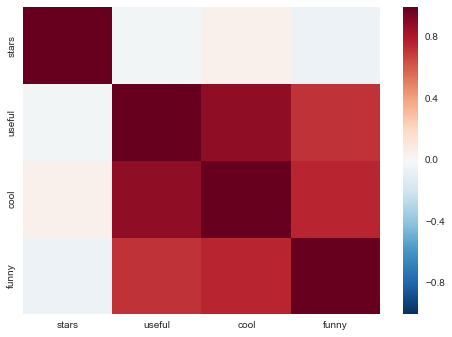

In [8]:
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp2.corr())

**display multiple scatter plots (cool, useful, funny) with linear regression line**

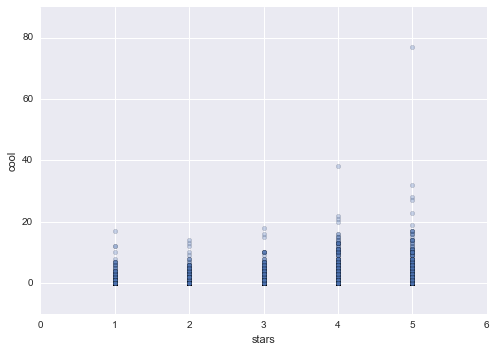

In [9]:
# Pandas scatter plot on 'cool'
yelp2.plot(kind='scatter', x='stars', y='cool', alpha=0.3)

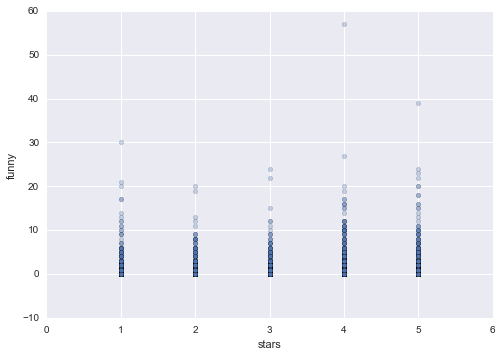

In [11]:
# Pandas scatter plot on 'funny'
yelp2.plot(kind='scatter', x='stars', y='funny', alpha=0.3)

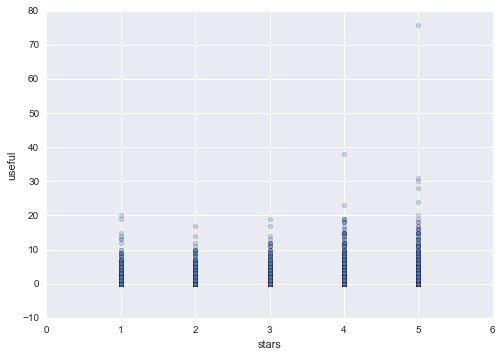

In [10]:
# Pandas scatter plot on 'useful'
yelp2.plot(kind='scatter', x='stars', y='useful', alpha=0.3)

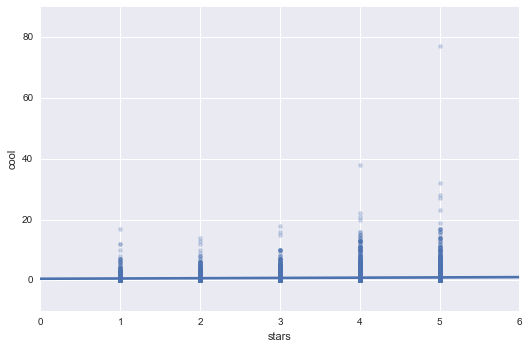

In [19]:
# Seaborn scatter plot with regression line on cool
sns.lmplot(x='stars', y='cool', data=yelp2, aspect=1.5, scatter_kws={'alpha':0.3})

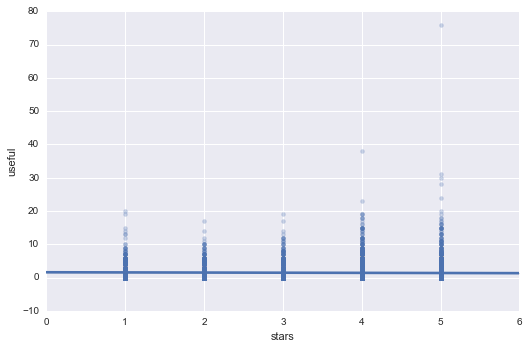

In [13]:
# Seaborn scatter plot with regression line on useful
sns.lmplot(x='stars', y='useful', data=yelp2, aspect=1.5, scatter_kws={'alpha':0.3})

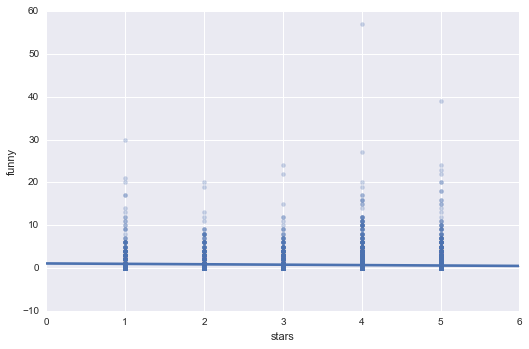

In [20]:
# Seaborn scatter plot with regression line on funny
sns.lmplot(x='stars', y='funny', data=yelp2, aspect=1.5, scatter_kws={'alpha':0.3})

# Tasks 3 & 4

In [21]:
# create X and y
feature_cols = ['cool', 'useful', 'funny']
X = yelp2[feature_cols]
y = yelp2.stars
X.shape

(10000, 3)

In [22]:
from sklearn.linear_model import LinearRegression
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [23]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('cool', 0.27435946858853977),
 ('useful', -0.14745239099401466),
 ('funny', -0.13567449053706701)]

**Commentary:** This exercise is challenging because, inherently, I don't see much relationship between the comment on the rating and the rating on the establishment? Additionally, about 35% of the 10000 reviews had no votes which would translate to a score of 0 if we plugged in zeros into the dependant values in the formula above? I guess we have to tolerate that the regression formula is an approximator but for it to return zeros 35% of the time when a zero rating does not exist just seems odd construction to me. I might have removed those records in the analysis if it really had been deemed to be worthy. This is a good mechanical exercise for me though on putting the parts together and working the stat muscle on that.

# Task 5 & 6

**Split the data into 2**

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=0)

In [34]:
X_test.shape

(4000, 3)

In [38]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp2[feature_cols]
    y = yelp2.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [39]:
print train_test_rmse(feature_cols)

1.17336862742


In [44]:
print train_test_rmse(['cool', 'useful', 'funny'])
print train_test_rmse(['cool'])
print train_test_rmse(['useful'])
print train_test_rmse(['funny'])
print train_test_rmse(['cool', 'useful'])
print train_test_rmse(['cool', 'funny'])
print train_test_rmse(['useful', 'funny'])

1.17336862742
1.20049049928
1.20143488625
1.20043591364
1.18537944234
1.1851949299
1.20070113589


**Closing commentary:**  
The RMSE, I'm thinking, is expressed in star points....and while that is a mentally accessible number this is not very intuitive to me.  Also the RMSEs are all very much close to each other in any combination so it gives me an impression that the overall meaninfulness of the set-up is questionable in terms of votes on comments being related to star levels.  Additionally, when i do the R2 on these below i get a very very low reading of .046 and .034 for the two samples which validates this position....great learning here and makes me want to do more. Bottom line maybe is that all the RMSEs above being closely bunched together is to be interpreted as all the RMSEs are really indistinguishable in how low they have a predictive capability despite on the surface 'cool' seeming to stand out. 

**Exploration below on the intercepts and coefficients and the R2.**

In [46]:
print linreg.intercept_
print linreg.coef_

3.82145672258
[ 0.30672895 -0.13359481 -0.16866061]


In [52]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# R2 for train set
linreg.score(X_train, y_train)

0.046579420971155416

In [53]:
linreg2 = LinearRegression()
linreg2.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# R2 for test set
linreg.score(X_test, y_test)

0.03403179332504136